In [254]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.utils import resample
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dhawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dhawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [255]:
df = pd.read_csv("yelp.csv")

df=df.drop(['Unnamed: 10','Unnamed: 11','review_id','date'],axis=1)

df=df.drop(['user_id','business_id','type'],axis=1)

## UPSAMPLE

In [256]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

### Coversion in lower case ###

In [257]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [258]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop=stop[0:144]
stop.append('back')
stop.append('n\'t')
stop.append('dice')

### Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

In [259]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### INCLUSION OF LENGTH OF REVIEW

In [260]:
df['length'] = df['text'].apply(len)

### Review vs Stars

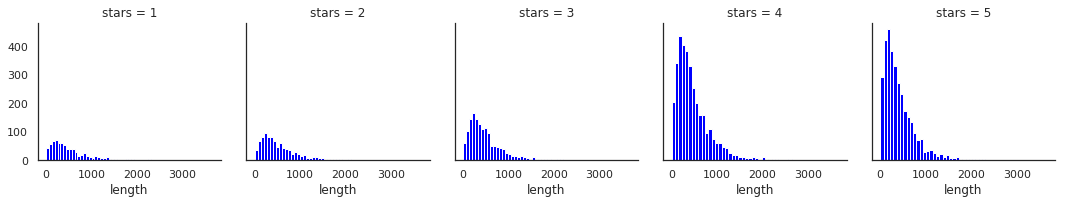

In [261]:
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

#### Removal of meaningless thing from text

In [262]:
def fun(x):
#     print(x)
    blob=TextBlob(x)
#     print("blob ",blob)
    verb=[]
    s=" "
    for word, tag in blob.tags:
#         print("ffff")
        if tag == 'RB' or tag=='RBR' or tag=='RBS' or tag=='JJ' or tag=='JJR':
            verb.append(word)
    s=s.join(verb)
    return s

In [263]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [264]:
df['text'] = df['text'].apply(fun)

# strv=df.groupby('stars').mean()
# stval.corr()
# strv.mean('cool')
# strv

# strv.corr()

### STEMMING

In [265]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [266]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [267]:
texts = df['text']
stars = df['stars']

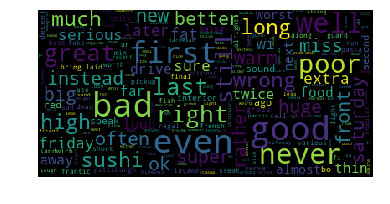

In [268]:
plot_word_cloud(df["text"].loc[df.stars == 1,])

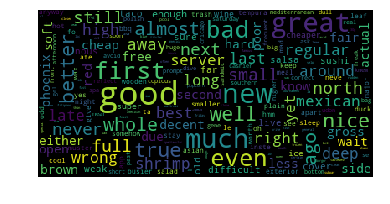

In [269]:
plot_word_cloud(df["text"].loc[df.stars == 2,])

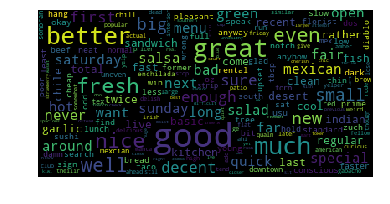

In [270]:
plot_word_cloud(df["text"].loc[df.stars == 3,])

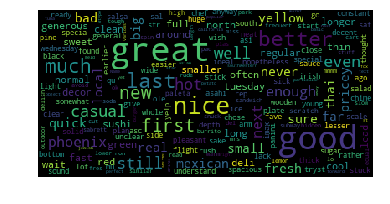

In [271]:
plot_word_cloud(df["text"].loc[df.stars == 4,])

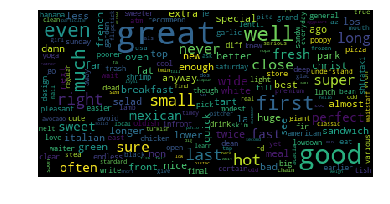

In [272]:
plot_word_cloud(df["text"].loc[df.stars == 5,])

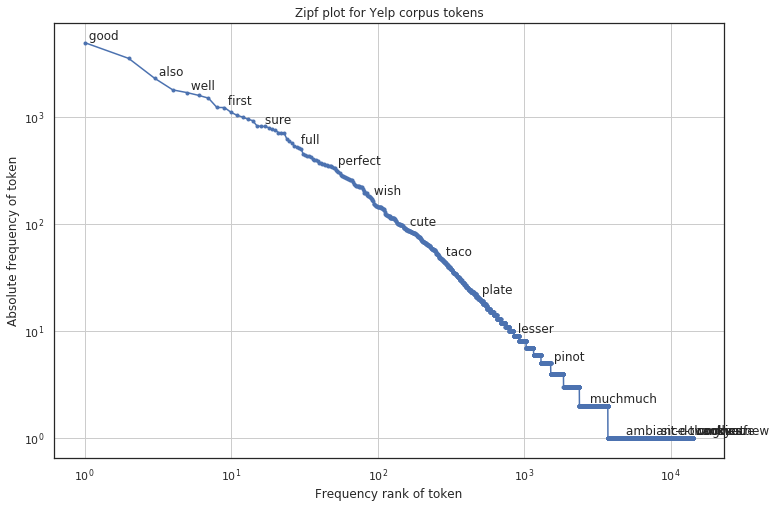

In [273]:
yelp_review_tokens = df.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(list(yelp_review_vocabulary.values()))
yelp_review_vocabulary_tokens = list(yelp_review_vocabulary.keys())

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [274]:
dict1={}
dict1[1]=[]
dict1[2]=[]
dict1[3]=[]
dict1[4]=[]
dict1[5]=[]

In [275]:
positive=0
negative=0
count=0
#polarity and star graph 

for i in df['text']:
    blob = TextBlob(i)
    feel = blob.sentiment
    if feel.polarity > 0:
        positive = positive + 1
    else:
        negative = negative + 1
    if(feel.polarity<0.10):
        df.loc[count, 'sentiment'] = int(1)
    elif(feel.polarity>=0.10 and feel.polarity < 0.16):
        df.loc[count, 'sentiment'] = int(2)
    elif(feel.polarity>=0.16 and feel.polarity < 0.025):
        df.loc[count, 'sentiment'] = int(3)
    elif(feel.polarity>=0.025 and feel.polarity < 0.35):
        df.loc[count, 'sentiment'] = int(4)
    else:
        df.loc[count, 'sentiment'] = int(5)
    w=df.loc[count, 'stars']
#     print(w)
    dict1[int(w)].append(feel.polarity)
    count=count+1

In [276]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = list(dict1.values())
y

[[-0.12676767676767672,
  5.551115123125783e-17,
  -0.1409090909090909,
  -0.3333333333333333,
  -0.18181818181818182,
  0.5,
  -0.2777777777777777,
  0.25,
  0.192406015037594,
  0.2866666666666667,
  0.10833333333333334,
  0.24000000000000005,
  0.27564935064935064,
  0.46666666666666673,
  0.475,
  0.3,
  0.35555555555555557,
  -0.46666666666666656,
  0.0,
  0.12222222222222222,
  0.25,
  0.3333333333333333,
  0.1142857142857143,
  0.2888888888888889,
  -0.025,
  0.02649572649572649,
  -0.11428571428571425,
  0.14151785714285714,
  -0.5,
  0.5,
  0.11666666666666665,
  0.24444444444444446,
  0.042129629629629656,
  0.0,
  0.125,
  -0.025892857142857134,
  -0.6999999999999998,
  -0.15833333333333333,
  -0.12777777777777777,
  0.0,
  0.06555658627087199,
  0.0,
  0.0625,
  0.02408424908424909,
  -0.11666666666666663,
  0.1,
  0.10000000000000005,
  0.1587566844919786,
  0.0,
  0.0,
  0.44999999999999996,
  0.356969696969697,
  0.0,
  0.4310606060606061,
  0.125,
  0.0,
  0.0,
  0.0,
 

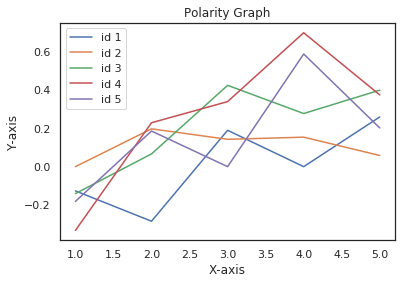

In [277]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polarity Graph")
for i in range(len(y)):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i+1))
plt.legend()
plt.show()

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

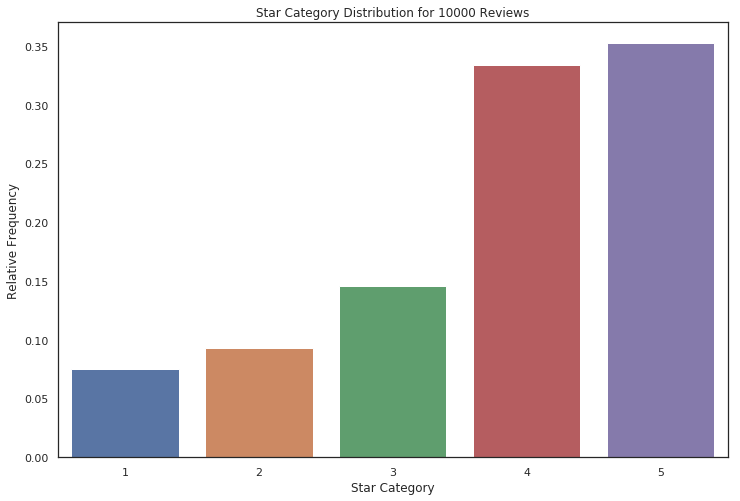

In [278]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df)));

In [279]:
stars_1 = df[df['stars']==1]
stars_2 = df[df['stars']==2]
stars_3 = df[df['stars']==3]
stars_5 = df[df['stars']==5]
stars_4 = df[df['stars']==4]

df_minority_upsampled_1 = resample(stars_1, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_2 = resample(stars_2, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_3 = resample(stars_3, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_minority_upsampled_5 = resample(stars_5, 
                                 replace=True, 
                                 n_samples=3526,
                                 random_state=123)
df_upsampled = pd.concat([stars_4, df_minority_upsampled_1,df_minority_upsampled_2,df_minority_upsampled_3,df_minority_upsampled_5])

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

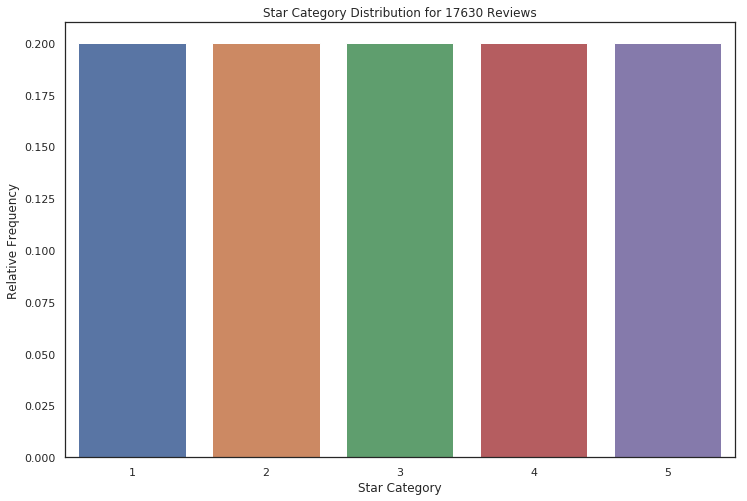

In [280]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df_upsampled.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_upsampled)));

In [281]:
stars = df_upsampled['stars']
print(Counter(stars))
balanced_y = stars
balanced_x = df_upsampled['text']

Counter({4: 3526, 1: 3526, 2: 3526, 3: 3526, 5: 3526})


In [282]:
# df_upsampled
# df_upsampled.reset_index()

### Data bais

In [283]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
# df_upsampled = df_upsampled.loc[:,~df_upsampled.columns.duplicated()]

In [284]:
# df_upsampled
# df_upsampled.reset_index()

In [285]:
df2=df_upsampled[['sentiment','text','stars']]


In [286]:
df2

,sentiment,text,stars
2,1.0,also,4
5,2.0,full wooden full even tuesday earlier enough f...,4
7,4.0,far pleasant next phoenix longer,4
8,5.0,sake great wait nice plan wish,4
13,5.0,good clean chose well good,4
14,4.0,new irish decor wednesday whole good small sal...,4
19,5.0,better better last ago rep in-flight still asc...,4
25,4.0,great nice ole real nice sugar smaller easier ...,4
27,4.0,much in-depth chime nonetheless special yellow...,4
28,4.0,tuesday casual much long pricey normal salsa h...,4


In [287]:
# df2.groupby('stars', as_index=False)['sentiment'].mean()

In [288]:
positive

8468

In [289]:
negative

1532

### TF-IDF ###
### This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation

In [290]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectors = vectorizer.fit_transform(balanced_x)
balanced_x.shape

(17630,)

In [291]:
# print(vectors)
# print(vectors.shape[0])
# print(vectors.shape[1])

X_train, X_test, y_train, y_test = train_test_split(df2, balanced_y, test_size=0.20, random_state=42)

In [292]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer
# build the pipeline
# ppl = Pipeline([
#               ('ngram',TfidfVectorizer(ngram_range=(1,2))),
#               ('clf',   LinearSVC())
              
#       ])

# # train the classifier
# model = ppl.fit(balanced_x,stars)

# # test the classifier
# y_test = model.predict(balanced_x)
# class sentiments(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
#         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self

# # pipeline = Pipeline([
# #     ('feats', FeatureUnion([
# #         ('ave', sentiments())
# # #         ('ngram', TfidfVectorizer(ngram_range=(1,2))) # can pass in either a pipeline
# #         # or a transformer
# #     ])),
# #     ('clf', MultinomialNB())  # classifier
# # ])

# class tokenizer1(BaseEstimator, TransformerMixin):
#     """Takes in dataframe, extracts road name column, outputs average word length"""

#     def __init__(self):
#         pass

#     def average_word_length(self, name):
# #         return df2['sentiment']
#         """Helper code to compute average word length of a name"""
# #         return np.mean([len(word) for word in name.split()])

#     def transform(self, df, y=None):
#         """The workhorse of this feature extractor"""
#         return df2['sentiment']

#     def fit(self, df, y=None):
#         """Returns `self` unless something different happens in train and test"""
#         return self
    
# get_text_data = X_train['text']
# # get_numeric_data =pd.getX_train['sentiment']
# get_numeric_data=pd.get_dummies(X_train['sentiment'])


# process_and_join_features = Pipeline([
#     ('features', FeatureUnion([
#             ('numeric_features', Pipeline([
#                 ('selector', get_numeric_data)
#             ])),
#              ('text_features', Pipeline([
#                 ('selector', get_text_data),
#                 ('vec', CountVectorizer())
#             ]))
#          ])),
#     ('clf',MultinomialNB())
# ])

# model = process_and_join_features.fit(X_train,stars)
# y_test1 = model.predict(X_train)
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['sentiment']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(X_train)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(X_train)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
9932                     either wrong next better mexican
9453                                            good sure
7267    hot yet frozen small yogurt neat give free awa...
6393    short well knew even hole park short hard flat...
8995    sky old actual wrong lane bad clean enter much...
Name: text, dtype: object

Numeric Data
      sentiment
9932        1.0
9453        5.0
7267        4.0
6393        4.0
8995        1.0


In [293]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn import LogisticRegression
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
#                     ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data

In [294]:
X_train

,sentiment,text,stars
9932,1.0,either wrong next better mexican,2
9453,5.0,good sure,5
7267,4.0,hot yet frozen small yogurt neat give free awa...,2
6393,4.0,short well knew even hole park short hard flat...,4
8995,1.0,sky old actual wrong lane bad clean enter much...,2
4581,5.0,great fun skip,3
5088,4.0,lunch marzen sandwich garlic good tasteless ga...,3
4970,4.0,yet clear lame grand good great still better t...,4
7570,5.0,good even better main ahi butterfish well dess...,4
7851,4.0,* common * fast * cool 100-year-old cool urban...,3


In [295]:
y_train

9932    2
9453    5
7267    2
6393    4
8995    2
4581    3
5088    3
4970    4
7570    4
7851    3
6168    4
3238    1
4699    5
5360    3
4593    5
5739    1
5519    1
6634    1
3407    3
4969    2
6196    1
3988    2
7006    4
642     4
7606    3
1062    3
1064    4
3062    2
7740    1
9160    1
       ..
4464    2
7142    1
4640    1
5334    3
3585    4
5429    4
8613    4
560     4
7826    4
1182    2
1418    1
2397    5
5705    1
8541    1
8291    1
6958    4
2218    4
4777    4
5498    2
8635    5
4027    3
4858    5
4252    1
5637    5
389     1
1503    3
9283    3
8866    1
2464    4
7163    5
Name: stars, Length: 14104, dtype: int64

In [296]:
pl.fit(X_train, y_train)

# Compute and print accuracy

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7fe410479d90>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [297]:
X_test

,sentiment,text,stars
5988,5.0,az great la good good nyc hundred-year-old har...,5
8988,4.0,good bad good total full better good,2
8448,2.0,long never goodyear oct dine good old still ne...,1
997,1.0,much great sick later,2
1267,5.0,wild scarf want hickey great sourdough mitten ...,4
4713,4.0,pizza fresh,5
4201,4.0,quick ago still,1
7501,5.0,good cheap,3
5068,2.0,along n-s canal around east hard west even tra...,4
2528,2.0,want classic quiet live old golden popular val...,3


In [298]:
y_test1 = pl.predict(X_test)

In [299]:
print(y_test1)
print(len(y_test1))

[3 2 1 ... 5 1 3]
3526


In [300]:
# accuracy = pl.score(y_test1, y_test)
# print("\nAccuracy on sample data - all data: ", accuracy)

In [301]:
y_test
print(len(y_test))

3526


In [302]:
y_test
print(accuracy_score(y_test,y_test1))

0.6236528644356211


In [303]:
# from sklearn.pipeline import Pipeline, FeatureUnion

# pipeline = Pipeline([
#     ('feats', FeatureUnion([
#         ('ngram', ngram_count_pipeline), # can pass in either a pipeline
#         ('ave', AverageWordLengthExtractor()) # or a transformer
#     ])),
#     ('clf', LinearSVC())  # classifier
# ])

### Linear SVC

In [305]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

In [ ]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

In [ ]:
print(accuracy_score(y_test, preds))

In [ ]:
confusion_matrix(y_test, preds)

### NN

In [ ]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2)*100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predmnb = mnb.predict(X_test)

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(X_train, y_train)
predgbi = gbi.predict(X_test)

In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
# print("Classification Report:",classification_report(y_test,predgbi))

### Logistic

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [ ]:
y_test

In [ ]:
print(accuracy_score(y_test, y_test1)*100)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

In [ ]:
predicted= model.predict(X_test.toarray())

In [ ]:
print(accuracy_score(y_test, predicted)*100)